# IS597 MLC - Final Project
# Integrative Predictive Modeling of Diabetes Risk: Leveraging Health Indicators and Socio-Demographic Factors

- Name - Vaishnavi Jayarama    
- netid - vj15

# Part 2

In [2]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 5.1 MB/s eta 0:00:00:00:0100:01


In [3]:
import pandas as pd
from sklearn.utils import resample

file_path = 'diabetes_012_health_indicators_BRFSS2015.csv'  
data = pd.read_csv(file_path)

In [4]:
column_names = data.columns.tolist()
column_names[column_names.index('Diabetes_012')] = 'Diabetes_binary'
data.columns = column_names

print(data.columns)

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [5]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [6]:
data.value_counts('Diabetes_binary')

Diabetes_binary
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

# Balancing the dataset

In [7]:
import pandas as p
from sklearn.utils import resample

#Separate the classes
no_diabetes = data[data['Diabetes_binary'] == 0]
pre_diabetes = data[data['Diabetes_binary'] == 1]
diabetes = data[data['Diabetes_binary'] == 2]

#Find the number of samples in the smallest class
n_samples = min(len(no_diabetes), len(pre_diabetes), len(diabetes))

#Downsample each class to the size of the smallest class
no_diabetes_downsampled = resample(no_diabetes, replace=False, n_samples=n_samples, random_state=42)
pre_diabetes_downsampled = resample(pre_diabetes, replace=False, n_samples=n_samples, random_state=42)
diabetes_downsampled = resample(diabetes, replace=False, n_samples=n_samples, random_state=42)

#Combine back into a single DataFrame
balanced_data = pd.concat([no_diabetes_downsampled, pre_diabetes_downsampled, diabetes_downsampled])

#Shuffle the dataset to prevent any order bias
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [8]:
balanced_data.value_counts('Diabetes_binary')

Diabetes_binary
0.0    4631
1.0    4631
2.0    4631
Name: count, dtype: int64

In [9]:
balanced_data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,2.0,0.0,0.0,1.0,27.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,4.0,5.0,15.0,1.0,0.0,10.0,2.0,2.0
1,0.0,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,4.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
3,1.0,1.0,1.0,1.0,29.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,11.0,5.0,8.0
4,2.0,1.0,1.0,1.0,33.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,2.0,0.0,0.0,8.0,4.0,8.0


Considered all three classes: 0 - No diabetic, 1 - Pre-diabetic, 2 - Diabetic

In [10]:
#Import all necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Machine Learning Models

# 1. Random Forest Model

## Model training - Using all Features

Random Forest Model Accuracy: 50.77%
Random Forest Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      0.61      0.60       895
         1.0       0.40      0.39      0.40       899
         2.0       0.51      0.52      0.52       985

    accuracy                           0.51      2779
   macro avg       0.51      0.51      0.51      2779
weighted avg       0.51      0.51      0.51      2779



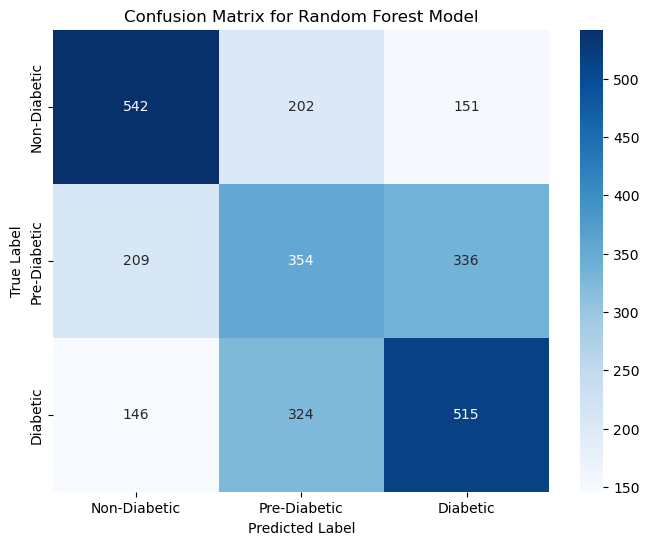

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#Define features and target
X_rf_all = balanced_data.drop('Diabetes_binary', axis=1)
y_rf_all = balanced_data['Diabetes_binary']

#Splitting the data into training and testing sets
X_train_rf_all, X_test_rf_all, y_train_rf_all, y_test_rf_all = train_test_split(X_rf_all, y_rf_all, test_size=0.2, random_state=42)

#Initialize and train the Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_rf_all, y_train_rf_all)

#Predictions
y_pred_rf_all = rf.predict(X_test_rf_all)

#Evaluation
rf_all_accuracy = accuracy_score(y_test_rf_all, y_pred_rf_all)
rf_all_report = classification_report(y_test_rf_all, y_pred_rf_all)
rf_all_conf_matrix = confusion_matrix(y_test_rf_all, y_pred_rf_all)

#Display results
print(f"Random Forest Model Accuracy: {rf_all_accuracy:.2%}")
print("Random Forest Model Classification Report:")
print(rf_all_report)

#Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_all_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Pre-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Pre-Diabetic','Diabetic'])
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Model Tuning

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py", line 666, in _valida

Fine Tuned Random Forest Model Accuracy: 53.22%
Fine Tuned Random Forest Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      0.65      0.63       895
         1.0       0.42      0.34      0.38       899
         2.0       0.54      0.60      0.57       985

    accuracy                           0.53      2779
   macro avg       0.52      0.53      0.52      2779
weighted avg       0.52      0.53      0.53      2779



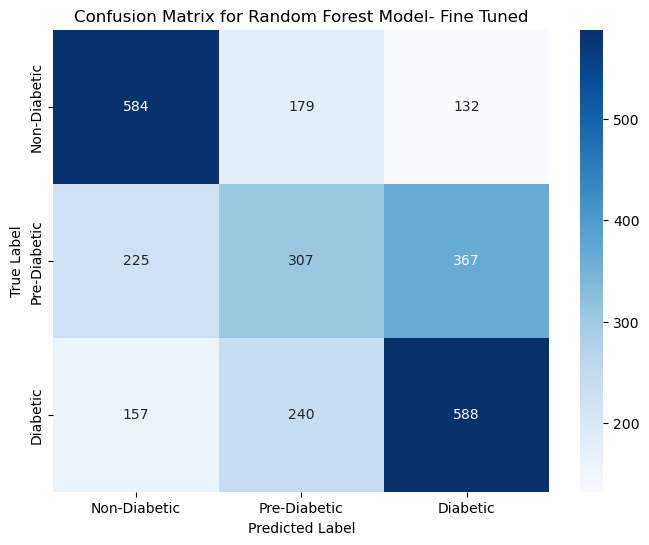

In [13]:
from sklearn.model_selection import GridSearchCV

#Parameter grid
param_grid_rf_all = {
    'n_estimators': [50, 100],  # Reduced for quicker execution
    'max_features': ['auto', 'sqrt'],  # Reduced number of options
    'max_depth': [None, 10, 20],  # Multiple options to evaluate effectiveness of pruning
    'min_samples_split': [2, 5],  # Reduced number of options
    'min_samples_leaf': [1, 2]  # Important for preventing overfitting
}

#Initialize Grid Search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf_all, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train_rf_all, y_train_rf_all)

#Best model
best_rf_all = grid_search.best_estimator_

#Re-evaluate with the best parameters
y_pred_rf_all_best = best_rf_all.predict(X_test_rf_all)
rf_all_best_accuracy = accuracy_score(y_test_rf_all, y_pred_rf_all_best)
rf_all_best_report = classification_report(y_test_rf_all, y_pred_rf_all_best)
rf_all_best_conf_matrix = confusion_matrix(y_test_rf_all, y_pred_rf_all_best)

#Display the metrics
print(f"Fine Tuned Random Forest Model Accuracy: {rf_all_best_accuracy:.2%}")
print("Fine Tuned Random Forest Model Classification Report:")
print(rf_all_best_report)

#Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_all_best_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Pre-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Pre-Diabetic','Diabetic'])
plt.title('Confusion Matrix for Random Forest Model- Fine Tuned')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Using Combined Feature Set

In [15]:
#Feature importance
importances = best_rf_all.feature_importances_
features = X_rf_all.columns
feature_importance_df_rf = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df_rf.sort_values(by='Importance', ascending=False, inplace=True)

#Display the feature importances
print(feature_importance_df_rf)

                 Feature  Importance
3                    BMI    0.144952
13               GenHlth    0.134419
18                   Age    0.124928
0                 HighBP    0.103578
20                Income    0.072427
1               HighChol    0.058650
15              PhysHlth    0.056685
14              MentHlth    0.049836
19             Education    0.042549
16              DiffWalk    0.032393
6   HeartDiseaseorAttack    0.029380
7           PhysActivity    0.020045
17                   Sex    0.017789
8                 Fruits    0.017673
4                 Smoker    0.017266
9                Veggies    0.016576
12           NoDocbcCost    0.016328
10     HvyAlcoholConsump    0.013268
5                 Stroke    0.011670
2              CholCheck    0.009831
11         AnyHealthcare    0.009756


Fitting 3 folds for each of 48 candidates, totalling 144 fits


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py", line 666, in _valida

Combined Feature Set Fine Tuned Random Forest Model Accuracy: 50.23%
Combined Feature Set Fine Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.59      0.61      0.60       926
         1.0       0.42      0.33      0.37       926
         2.0       0.48      0.57      0.52       927

    accuracy                           0.50      2779
   macro avg       0.50      0.50      0.50      2779
weighted avg       0.50      0.50      0.50      2779



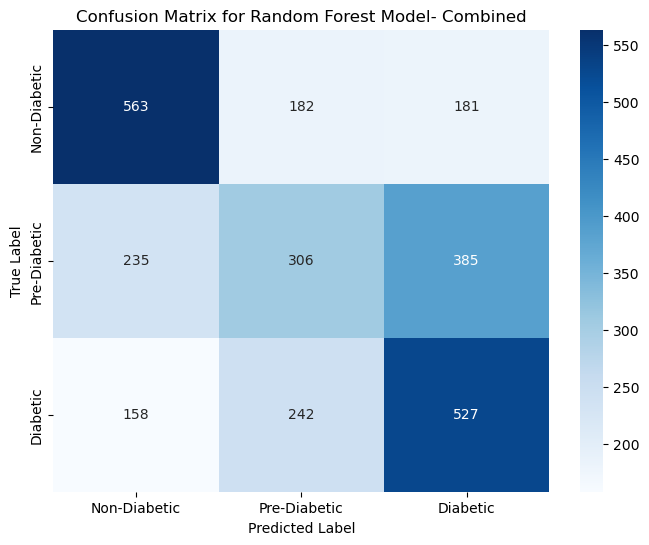

In [17]:
#Define features and target using the selected combined feature set
combined_features_rf = feature_importance_df_rf.head(10)['Feature'].tolist()

#Define features and targe
X_rf_combined_ft = balanced_data[combined_features_rf]
y_rf_combined_ft = balanced_data['Diabetes_binary']

#Split the data for combined feature set
X_train_rf_combined_ft, X_test_rf_combined_ft, y_train_rf_combined_ft, y_test_rf_combined_ft = train_test_split(
    X_rf_combined_ft, y_rf_combined_ft, test_size=0.2, stratify=y_rf_combined_ft, random_state=42)

#Initialize the Random Forest classifier for combined features
rf_classifier_combined_ft = RandomForestClassifier(random_state=42)

#Grid Search with cross-validation for combined features
grid_search_rf_combined_ft = GridSearchCV(estimator=rf_classifier_combined_ft, param_grid=param_grid_rf_all, cv=3, scoring='accuracy', verbose=1)
grid_search_rf_combined_ft.fit(X_train_rf_combined_ft, y_train_rf_combined_ft)

#Best model for combined features
best_rf_combined_ft = grid_search_rf_combined_ft.best_estimator_

#Predictions 
y_pred_rf_combined_ft = best_rf_combined_ft.predict(X_test_rf_combined_ft)

#Evaluation
accuracy_rf_combined_ft = accuracy_score(y_test_rf_combined_ft, y_pred_rf_combined_ft)
report_rf_combined_ft = classification_report(y_test_rf_combined_ft, y_pred_rf_combined_ft)
conf_matrix_rf_combined_ft = confusion_matrix(y_test_rf_combined_ft, y_pred_rf_combined_ft)

#Print the performance metrics
print(f"Combined Feature Set Fine Tuned Random Forest Model Accuracy: {accuracy_rf_combined_ft:.2%}")
print("Combined Feature Set Fine Tuned Random Forest Classification Report:")
print(report_rf_combined_ft)

#Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_combined_ft, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Pre-Diabetic','Diabetic'], yticklabels=['Non-Diabetic', 'Pre-Diabetic','Diabetic'])
plt.title('Confusion Matrix for Random Forest Model- Combined')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 2. XGBoost Model

## Model training - Using all Features

XGBoost Model (All Features) Accuracy: 51.17%
Classification Report for XGBoost Model (All Features):
              precision    recall  f1-score   support

         0.0       0.61      0.62      0.62       895
         1.0       0.39      0.37      0.38       899
         2.0       0.52      0.54      0.53       985

    accuracy                           0.51      2779
   macro avg       0.51      0.51      0.51      2779
weighted avg       0.51      0.51      0.51      2779



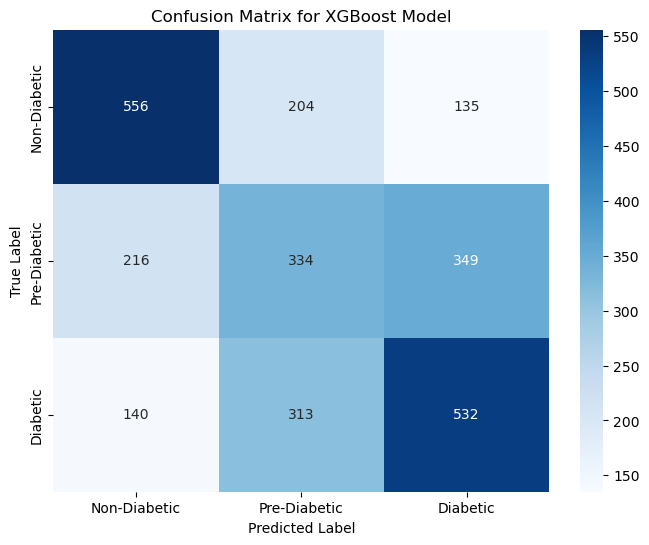

In [18]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Define features and target from the balanced dataset
X_xgb_all = balanced_data.drop('Diabetes_binary', axis=1)
y_xgb_all = balanced_data['Diabetes_binary']

#Splitting the dataset into training and testing sets
X_train_xgb_all, X_test_xgb_all, y_train_xgb_all, y_test_xgb_all = train_test_split(X_xgb_all, y_xgb_all, test_size=0.2, random_state=42)

#Initialize and train the XGBoost classifier
xgb_classifier_all = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_classifier_all.fit(X_train_xgb_all, y_train_xgb_all)

#Predictions
y_pred_xgb_all = xgb_classifier_all.predict(X_test_xgb_all)

#Evaluation
accuracy_xgb_all = accuracy_score(y_test_xgb_all, y_pred_xgb_all)
report_xgb_all = classification_report(y_test_xgb_all, y_pred_xgb_all)
conf_matrix_xgb_all = confusion_matrix(y_test_xgb_all, y_pred_xgb_all)

#Display results
print(f"XGBoost Model (All Features) Accuracy: {accuracy_xgb_all:.2%}")
print("Classification Report for XGBoost Model (All Features):")
print(report_xgb_all)

#Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb_all, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Pre-Diabetic','Diabetic'], yticklabels=['Non-Diabetic', 'Pre-Diabetic','Diabetic'])
plt.title('Confusion Matrix for XGBoost Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Using Combined Feature Set

In [19]:
importances_xgb_all = xgb_classifier_all.feature_importances_
features_xgb_all = X_train_xgb_all.columns
feature_importance_df_xgb_all = pd.DataFrame({'Feature': features_xgb_all, 'Importance': importances_xgb_all})
feature_importance_df_xgb_all.sort_values(by='Importance', ascending=False, inplace=True)

#Display the feature importances
print(feature_importance_df_xgb_all)

                 Feature  Importance
0                 HighBP    0.194724
13               GenHlth    0.106879
2              CholCheck    0.054958
1               HighChol    0.054317
18                   Age    0.048627
6   HeartDiseaseorAttack    0.045415
10     HvyAlcoholConsump    0.044185
3                    BMI    0.037620
16              DiffWalk    0.035461
20                Income    0.035398
12           NoDocbcCost    0.035352
5                 Stroke    0.032970
9                Veggies    0.032535
7           PhysActivity    0.031939
14              MentHlth    0.031444
17                   Sex    0.031030
15              PhysHlth    0.030191
8                 Fruits    0.029781
4                 Smoker    0.029300
19             Education    0.029174
11         AnyHealthcare    0.028698


XGBoost Model (Selected Features) Accuracy: 50.41%
Classification Report for XGBoost Model (Selected Features):
              precision    recall  f1-score   support

         0.0       0.61      0.60      0.61       895
         1.0       0.39      0.36      0.38       899
         2.0       0.51      0.55      0.53       985

    accuracy                           0.50      2779
   macro avg       0.50      0.50      0.50      2779
weighted avg       0.50      0.50      0.50      2779



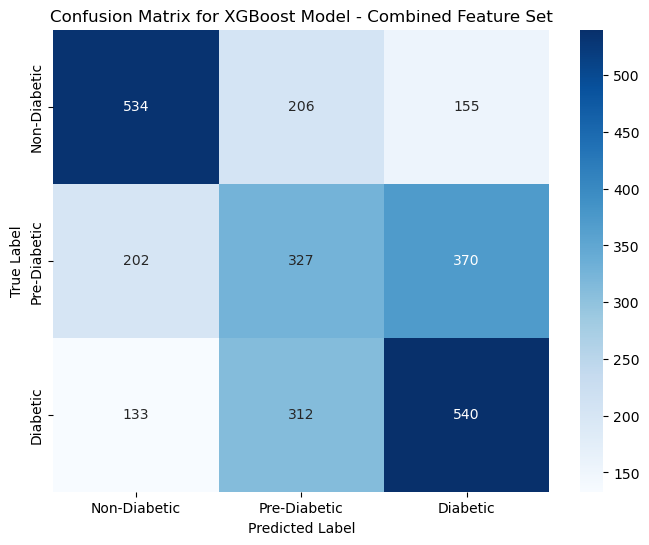

In [20]:
top_features_xgb = feature_importance_df_xgb_all.head(10)['Feature'].tolist()

#Define features and target using the selected feature set
X_xgb_selected = balanced_data[top_features_xgb]
y_xgb_selected = balanced_data['Diabetes_binary']

#Splitting the dataset into training and testing sets for the selected features
X_train_xgb_selected, X_test_xgb_selected, y_train_xgb_selected, y_test_xgb_selected = train_test_split(X_xgb_selected, y_xgb_selected, test_size=0.2, random_state=42)

#Initialize and train another XGBoost classifier
xgb_classifier_selected = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_classifier_selected.fit(X_train_xgb_selected, y_train_xgb_selected)

#Predictions
y_pred_xgb_selected = xgb_classifier_selected.predict(X_test_xgb_selected)

#Evaluation
accuracy_xgb_selected = accuracy_score(y_test_xgb_selected, y_pred_xgb_selected)
report_xgb_selected = classification_report(y_test_xgb_selected, y_pred_xgb_selected)
conf_matrix_xgb_selected = confusion_matrix(y_test_xgb_selected, y_pred_xgb_selected)

#Display results
print(f"XGBoost Model (Selected Features) Accuracy: {accuracy_xgb_selected:.2%}")
print("Classification Report for XGBoost Model (Selected Features):")
print(report_xgb_selected)

#Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb_selected, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Pre-Diabetic','Diabetic'], yticklabels=['Non-Diabetic', 'Pre-Diabetic','Diabetic'])
plt.title('Confusion Matrix for XGBoost Model - Combined Feature Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3. Ensemble Model

Ensemble Model Accuracy: 53.22%
Ensemble Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.62      0.67      0.64       895
         1.0       0.41      0.36      0.38       899
         2.0       0.54      0.57      0.56       985

    accuracy                           0.53      2779
   macro avg       0.52      0.53      0.53      2779
weighted avg       0.52      0.53      0.53      2779



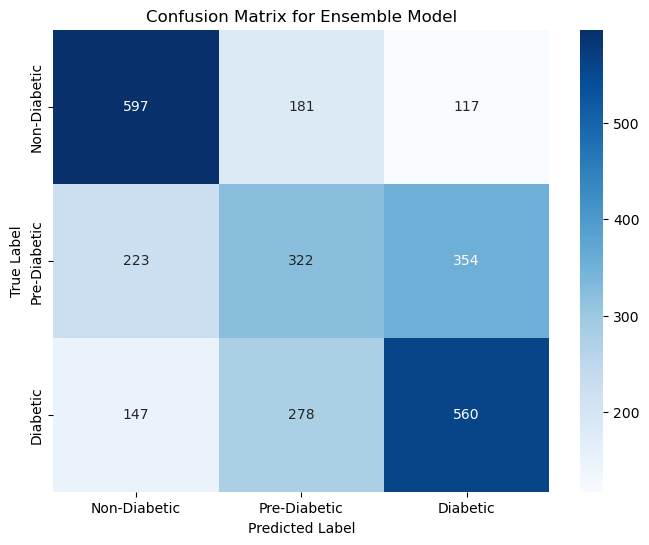

In [21]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


#Define features and target using the selected feature set
X_ens = balanced_data.drop('Diabetes_binary', axis = 1)
y_ens = balanced_data['Diabetes_binary']

#Splitting the dataset into training and testing sets for the selected features
X_train_ens, X_test_ens, y_train_ens, y_test_ens = train_test_split(X_ens, y_ens, test_size=0.2, random_state=42)

#Other models to ensemble
log_reg = LogisticRegression(max_iter=1000)
svc_model = SVC(probability=True)

#Voting classifier
ensemble_model = VotingClassifier(estimators=[
    ('xgb', xgb_classifier_all),
    ('lr', log_reg),
    ('svc', svc_model)
], voting='soft')

#Fit the ensemble model
ensemble_model.fit(X_train_ens, y_train_ens)

#Prediction
ensemble_pred = ensemble_model.predict(X_test_ens)

#Evaluate the model
ensemble_accuracy = accuracy_score(y_test_ens, ensemble_pred)
ensemble_report = classification_report(y_test_ens, ensemble_pred)
ens_conf = confusion_matrix(y_test_ens, ensemble_pred)

#Display results
print(f"Ensemble Model Accuracy: {ensemble_accuracy:.2%}")
print(f"Ensemble Model Classification Report:")
print(ensemble_report)

#Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(ens_conf, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Pre-Diabetic','Diabetic'], yticklabels=['Non-Diabetic', 'Pre-Diabetic','Diabetic'])
plt.title('Confusion Matrix for Ensemble Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Segmentation Analysis

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

#Load your dataset
data = balanced_data

#Ensure categorical variables are treated as category dtype
data['Sex'] = data['Sex'].astype('category')
data['Age'] = data['Age'].astype('category')  
data['Education'] = data['Education'].astype('category')
data['Income'] = data['Income'].astype('category')

#Define the target and features
X_cat = data.drop(['Diabetes_binary'], axis=1)  
y_cat = data['Diabetes_binary']

#Split the data into training and testing sets
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y_cat, test_size=0.3, random_state=42)

In [24]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,2.0,0.0,0.0,1.0,27.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,4.0,5.0,15.0,1.0,0.0,10.0,2.0,2.0
1,0.0,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,4.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
3,1.0,1.0,1.0,1.0,29.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,11.0,5.0,8.0
4,2.0,1.0,1.0,1.0,33.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,2.0,0.0,0.0,8.0,4.0,8.0


## 1. Logistic Regression Model

Logistic Regression Model Accuracy After Segmentation: 52.98%
Logistic Regression Model After Segmentation - Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.69      0.64      1360
         1.0       0.43      0.35      0.39      1369
         2.0       0.52      0.55      0.54      1439

    accuracy                           0.53      4168
   macro avg       0.52      0.53      0.52      4168
weighted avg       0.52      0.53      0.52      4168



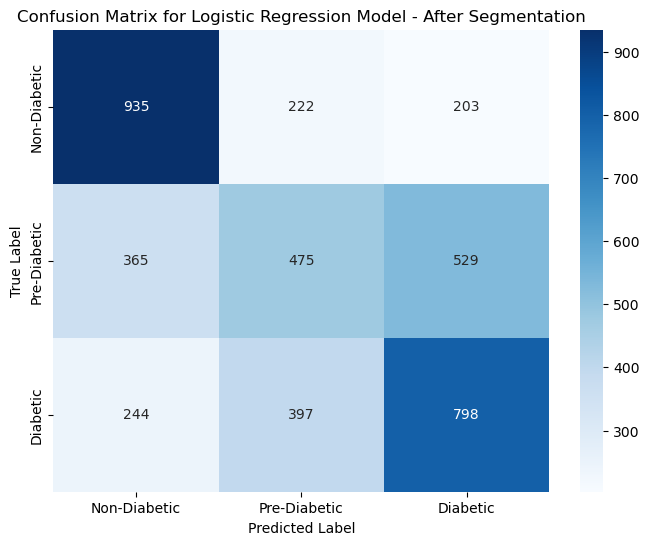

                 Feature  Coefficient
10     HvyAlcoholConsump     0.422743
11         AnyHealthcare     0.119959
5                 Stroke     0.090178
20                Income     0.042038
8                 Fruits     0.037424
7           PhysActivity     0.029790
19             Education     0.023655
15              PhysHlth     0.008035
14              MentHlth    -0.000624
9                Veggies    -0.010599
4                 Smoker    -0.033312
3                    BMI    -0.045999
16              DiffWalk    -0.084645
17                   Sex    -0.084784
18                   Age    -0.099812
6   HeartDiseaseorAttack    -0.112027
12           NoDocbcCost    -0.141570
13               GenHlth    -0.295922
0                 HighBP    -0.371189
1               HighChol    -0.386099
2              CholCheck    -0.737001


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_cat, y_train_cat)

#Make predictions and evaluate the model
y_pred_log_cat = log_reg.predict(X_test_cat)
log_accuracy_cat = accuracy_score(y_test_cat, y_pred_log_cat)
log_report_cat = classification_report(y_test_cat, y_pred_log_cat)
log_conf_cat = confusion_matrix(y_test_cat, y_pred_log_cat)

#Display results
print(f"Logistic Regression Model Accuracy After Segmentation: {log_accuracy_cat:.2%}")
print(f"Logistic Regression Model After Segmentation - Classification Report:")
print(log_report_cat)

#Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(log_conf_cat, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Pre-Diabetic','Diabetic'], yticklabels=['Non-Diabetic', 'Pre-Diabetic','Diabetic'])
plt.title('Confusion Matrix for Logistic Regression Model - After Segmentation')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#Display coefficients as feature importances
importance = pd.DataFrame({'Feature': X_train_cat.columns, 'Coefficient': log_reg.coef_[0]})
importance = importance.sort_values(by='Coefficient', ascending=False)
print(importance)

## 2. Random Forest Model

Random Forest Model Accuracy After Segmentation: 49.47%
Random Forest Model After Segmentation - Classification Report:
              precision    recall  f1-score   support

         0.0       0.59      0.61      0.60      1360
         1.0       0.39      0.36      0.37      1369
         2.0       0.49      0.52      0.50      1439

    accuracy                           0.49      4168
   macro avg       0.49      0.49      0.49      4168
weighted avg       0.49      0.49      0.49      4168



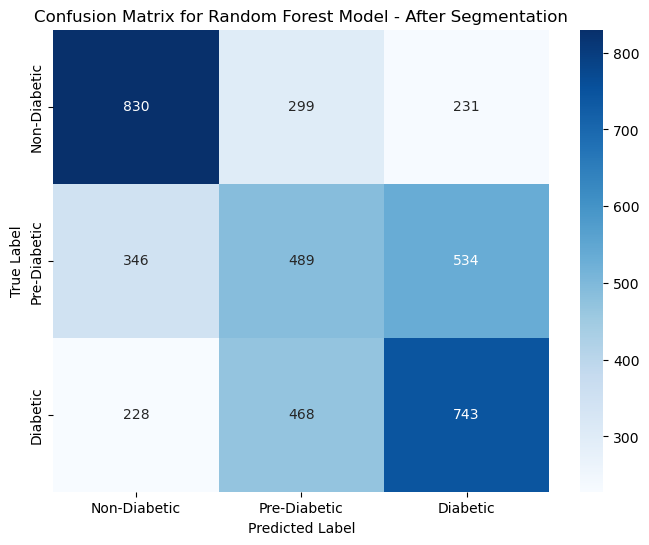

                 Feature  Importance
3                    BMI    0.165832
18                   Age    0.133365
20                Income    0.098471
15              PhysHlth    0.074718
13               GenHlth    0.073432
19             Education    0.069020
14              MentHlth    0.063779
4                 Smoker    0.035991
0                 HighBP    0.035917
17                   Sex    0.035901
8                 Fruits    0.035695
1               HighChol    0.030755
7           PhysActivity    0.028940
9                Veggies    0.027320
16              DiffWalk    0.020322
6   HeartDiseaseorAttack    0.018090
12           NoDocbcCost    0.015603
5                 Stroke    0.012084
10     HvyAlcoholConsump    0.010069
11         AnyHealthcare    0.009721
2              CholCheck    0.004975


In [36]:
from sklearn.ensemble import RandomForestClassifier

#Initialize and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_cat, y_train_cat)

#Predict and evaluate
y_pred_rf_cat = rf.predict(X_test_cat)
rf_accuracy_cat = accuracy_score(y_test_cat, y_pred_rf_cat)
rf_report_cat = classification_report(y_test_cat, y_pred_rf_cat)
rf_conf_cat = confusion_matrix(y_test_cat, y_pred_rf_cat)

#Display results
print(f"Random Forest Model Accuracy After Segmentation: {rf_accuracy_cat:.2%}")
print(f"Random Forest Model After Segmentation - Classification Report:")
print(rf_report_cat)

#Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_cat, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Pre-Diabetic','Diabetic'], yticklabels=['Non-Diabetic', 'Pre-Diabetic','Diabetic'])
plt.title('Confusion Matrix for Random Forest Model - After Segmentation')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#Get feature importances
features_importance = pd.DataFrame({'Feature': X_train_cat.columns, 'Importance': rf.feature_importances_})
features_importance = features_importance.sort_values(by='Importance', ascending=False)
print(features_importance)

# Plotting Diabetes Status Distributions for Categorical Variables

/tmp/ipykernel_11107/4128984872.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sex_distribution = data.pivot_table(index = 'Sex', columns = 'Diabetes_binary', aggfunc = 'size', fill_value = 0)
/tmp/ipykernel_11107/4128984872.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  age_distribution = data.pivot_table(index='Age', columns='Diabetes_binary', aggfunc='size', fill_value=0)
/tmp/ipykernel_11107/4128984872.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  education_distribution = data.pivot_

<Figure size 1200x600 with 0 Axes>

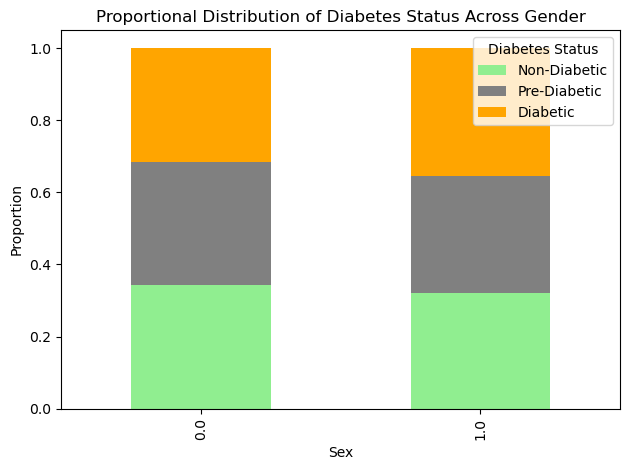

<Figure size 1200x600 with 0 Axes>

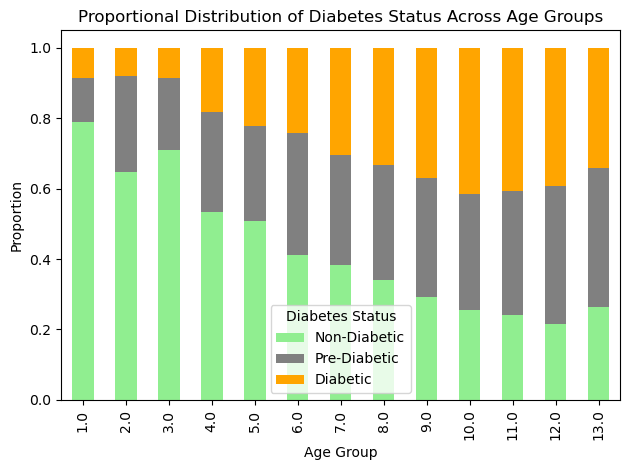

<Figure size 1200x600 with 0 Axes>

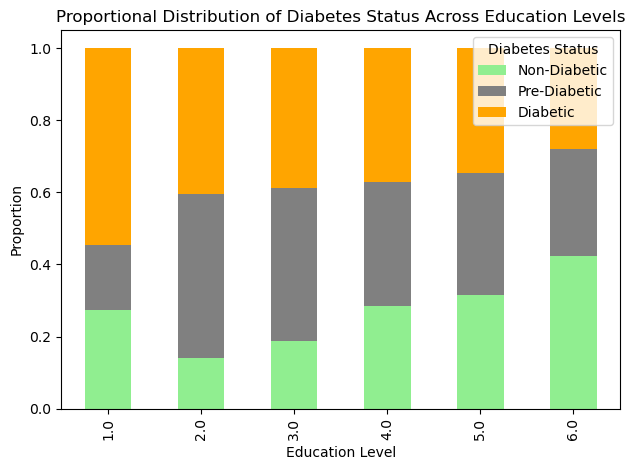

<Figure size 1200x600 with 0 Axes>

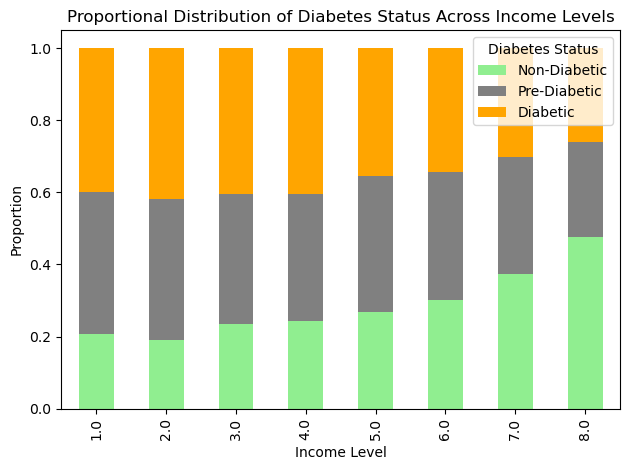

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Analyzing the distribution across Diabetes_binary for categorical data
#Calculating the proportion of each Diabetes_binary category within each group
sex_distribution = data.pivot_table(index = 'Sex', columns = 'Diabetes_binary', aggfunc = 'size', fill_value = 0)
age_distribution = data.pivot_table(index='Age', columns='Diabetes_binary', aggfunc='size', fill_value=0)
education_distribution = data.pivot_table(index='Education', columns='Diabetes_binary', aggfunc='size', fill_value=0)
income_distribution = data.pivot_table(index='Income', columns='Diabetes_binary', aggfunc='size', fill_value=0)

#Normalize the distribution to get proportions instead of absolute counts
sex_distribution_prop = sex_distribution.div(sex_distribution.sum(axis=1), axis=0)
age_distribution_prop = age_distribution.div(age_distribution.sum(axis=1), axis=0)
education_distribution_prop = education_distribution.div(education_distribution.sum(axis=1), axis=0)
income_distribution_prop = income_distribution.div(income_distribution.sum(axis=1), axis=0)

#Plotting the distribution of diabetes status across sex
plt.figure(figsize=(12, 6))
sex_distribution_prop.plot(kind='bar', stacked=True, color=['lightgreen', 'gray', 'orange'])
plt.title('Proportional Distribution of Diabetes Status Across Gender')
plt.xlabel('Sex')
plt.ylabel('Proportion')
plt.legend(title='Diabetes Status', labels=['Non-Diabetic', 'Pre-Diabetic', 'Diabetic'])
plt.tight_layout()
plt.show()

#Plotting the distribution of diabetes status across different age groups
plt.figure(figsize=(12, 6))
age_distribution_prop.plot(kind='bar', stacked=True, color=['lightgreen', 'gray', 'orange'])
plt.title('Proportional Distribution of Diabetes Status Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(title='Diabetes Status', labels=['Non-Diabetic', 'Pre-Diabetic', 'Diabetic'])
plt.tight_layout()
plt.show()

#Plotting the distribution of diabetes status across education levels
plt.figure(figsize=(12, 6))
education_distribution_prop.plot(kind='bar', stacked=True, color=['lightgreen', 'gray', 'orange'])
plt.title('Proportional Distribution of Diabetes Status Across Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.legend(title='Diabetes Status', labels=['Non-Diabetic', 'Pre-Diabetic', 'Diabetic'])
plt.tight_layout()
plt.show()

#Plotting the distribution of diabetes status across income levels
plt.figure(figsize=(12, 6))
income_distribution_prop.plot(kind='bar', stacked=True, color=['lightgreen', 'gray', 'orange'])
plt.title('Proportional Distribution of Diabetes Status Across Income Levels')
plt.xlabel('Income Level')
plt.ylabel('Proportion')
plt.legend(title='Diabetes Status', labels=['Non-Diabetic', 'Pre-Diabetic', 'Diabetic'])
plt.tight_layout()
plt.show()

# Risk Factor Analysis

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

data_filtered = data

#Filter to include only pre-diabetic (1) and diabetic (2) individuals
data_filtered = data[data['Diabetes_binary'] != 0]

#Recode Diabetes_binary to be binary: 0 for pre-diabetic, 1 for diabetic
data_filtered['Diabetes_binary'] = data_filtered['Diabetes_binary'].apply(lambda x: 0 if x == 1 else 1)

#Define features and target
X_fil = data_filtered.drop(['Diabetes_binary'], axis=1)
y_fil = data_filtered['Diabetes_binary']

#Split the data into training and testing sets
X_train_fil, X_test_fil, y_train_fil, y_test_fil = train_test_split(X_fil, y_fil, test_size=0.3, random_state=42)

/tmp/ipykernel_11107/2496574957.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Diabetes_binary'] = data_filtered['Diabetes_binary'].apply(lambda x: 0 if x == 1 else 1)


In [56]:
data_filtered.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,0.0,0.0,1.0,27.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,4.0,5.0,15.0,1.0,0.0,10.0,2.0,2.0
3,0,1.0,1.0,1.0,29.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,11.0,5.0,8.0
4,1,1.0,1.0,1.0,33.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,2.0,0.0,0.0,8.0,4.0,8.0
5,1,0.0,0.0,1.0,37.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,5.0,1.0,0.0,0.0,11.0,4.0,4.0
7,0,1.0,0.0,1.0,24.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,3.0,0.0,0.0,0.0,1.0,10.0,4.0,4.0


In [57]:
data_filtered.value_counts('Diabetes_binary')

Diabetes_binary
0    4631
1    4631
Name: count, dtype: int64

## Using Logistic Regression Model

Risk Factor Analysis- Logistic Regression Model Accuracy: 59.19%
Risk Factor Analysis- Logistic Regression Model Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.58      0.59      1392
           1       0.59      0.60      0.60      1387

    accuracy                           0.59      2779
   macro avg       0.59      0.59      0.59      2779
weighted avg       0.59      0.59      0.59      2779



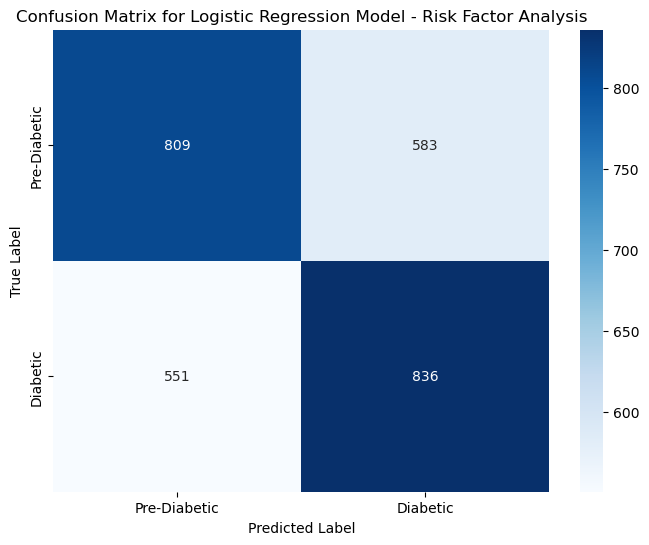

Feature Importance from Risk Factor Analysis
                  Feature  Coefficient
2              CholCheck     0.525531
0                 HighBP     0.345571
6   HeartDiseaseorAttack     0.318551
13               GenHlth     0.275540
5                 Stroke     0.258393
17                   Sex     0.160011
16              DiffWalk     0.135944
9                Veggies     0.099265
1               HighChol     0.093137
4                 Smoker     0.058102
11         AnyHealthcare     0.053538
19             Education     0.041357
3                    BMI     0.020154
18                   Age     0.014777
20                Income     0.006854
15              PhysHlth    -0.004500
14              MentHlth    -0.010758
7           PhysActivity    -0.050769
8                 Fruits    -0.085936
12           NoDocbcCost    -0.402379
10     HvyAlcoholConsump    -0.642171


In [58]:
#Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_fil, y_train_fil)

#Predictions and evaluation
y_pred_fil = log_reg.predict(X_test_fil)
risk_accuracy = accuracy_score(y_test_fil, y_pred_fil)
risk_report = classification_report(y_test_fil, y_pred_fil)
risk_conf = confusion_matrix(y_test_fil, y_pred_fil)

#Display results
print(f"Risk Factor Analysis- Logistic Regression Model Accuracy: {risk_accuracy:.2%}")
print(f"Risk Factor Analysis- Logistic Regression Model Classification Report:")
print(risk_report)

#Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(risk_conf, annot=True, fmt='d', cmap='Blues', xticklabels=['Pre-Diabetic','Diabetic'], yticklabels=['Pre-Diabetic','Diabetic'])
plt.title('Confusion Matrix for Logistic Regression Model - Risk Factor Analysis')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#Get feature importances
importance = pd.DataFrame({'Feature': X_train_fil.columns, 'Coefficient': log_reg.coef_[0]})
importance = importance.sort_values(by='Coefficient', ascending=False)
print('Feature Importance from Risk Factor Analysis\n', importance)

Features that impact Pre-Diabetic cases the most 

## Combined Feature Analysis

In [60]:
import pandas as pd
import statsmodels.api as sm

#Creating interaction terms
data_filtered['BPxChol'] = data_filtered['HighBP'] * data_filtered['HighChol']
data_filtered['BPxHeartDisease'] = data_filtered['HighBP'] * data_filtered['HeartDiseaseorAttack']

#Selecting significant features and interaction terms for the model
X_comb = data_filtered[['HighBP', 'HighChol', 'HeartDiseaseorAttack', 'BPxChol', 'BPxHeartDisease']]
y_comb = data_filtered['Diabetes_binary']

#Adding constant for statsmodels
X_comb = sm.add_constant(X_comb)

#Logistic regression
model_comb = sm.Logit(y_comb, X_comb)
result_comb = model_comb.fit()
print(result_comb.summary())

Optimization terminated successfully.
         Current function value: 0.680803
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:                 9262
Model:                          Logit   Df Residuals:                     9256
Method:                           MLE   Df Model:                            5
Date:                Sun, 05 May 2024   Pseudo R-squ.:                 0.01781
Time:                        22:36:27   Log-Likelihood:                -6305.6
converged:                       True   LL-Null:                       -6419.9
Covariance Type:            nonrobust   LLR p-value:                 2.061e-47
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4574      0.055     -8.315      0.000      -0.565      -0.350

/tmp/ipykernel_11107/3296660572.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['BPxChol'] = data_filtered['HighBP'] * data_filtered['HighChol']
/tmp/ipykernel_11107/3296660572.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['BPxHeartDisease'] = data_filtered['HighBP'] * data_filtered['HeartDiseaseorAttack']


## Stratifying Categorical Variables

In [64]:
#Stratifying and summarizing by age groups and high BP
grouped = data_filtered.groupby(['Age', 'HighBP'])
summary_comb = grouped['Diabetes_binary'].agg(['mean', 'count'])
print(summary_comb)

                 mean  count
Age  HighBP                 
1.0  0.0     0.423077     26
     1.0     0.333333      9
2.0  0.0     0.214286     56
     1.0     0.285714     14
3.0  0.0     0.303030     66
     1.0     0.277778     36
4.0  0.0     0.340426    141
     1.0     0.467391     92
5.0  0.0     0.390411    146
     1.0     0.506667    150
6.0  0.0     0.360515    233
     1.0     0.453020    298
7.0  0.0     0.403909    307
     1.0     0.546332    518
8.0  0.0     0.418539    356
     1.0     0.541444    748
9.0  0.0     0.439430    421
     1.0     0.554067   1045
10.0 0.0     0.459658    409
     1.0     0.590361   1162
11.0 0.0     0.436533    323
     1.0     0.568345    973
12.0 0.0     0.400000    205
     1.0     0.529927    685
13.0 0.0     0.406393    219
     1.0     0.482372    624


/tmp/ipykernel_11107/4241644392.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data_filtered.groupby(['Age', 'HighBP'])


In [70]:
#Stratifying and summarizing by sex and high cholestrol
grouped_sex = data_filtered.groupby(['Sex', 'HighChol'])
summary_sex = grouped_sex['Diabetes_binary'].agg(['mean', 'count'])
print(summary_sex)

                  mean  count
Sex HighChol                 
0.0 0.0       0.447398   1806
    1.0       0.497811   3198
1.0 0.0       0.483299   1467
    1.0       0.545324   2791


/tmp/ipykernel_11107/3263866204.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_sex = data_filtered.groupby(['Sex', 'HighChol'])


## SHAP Analysis

Accuracy of XGBoost for pre-diabetic and diabetic cases: 0.5552356962936308


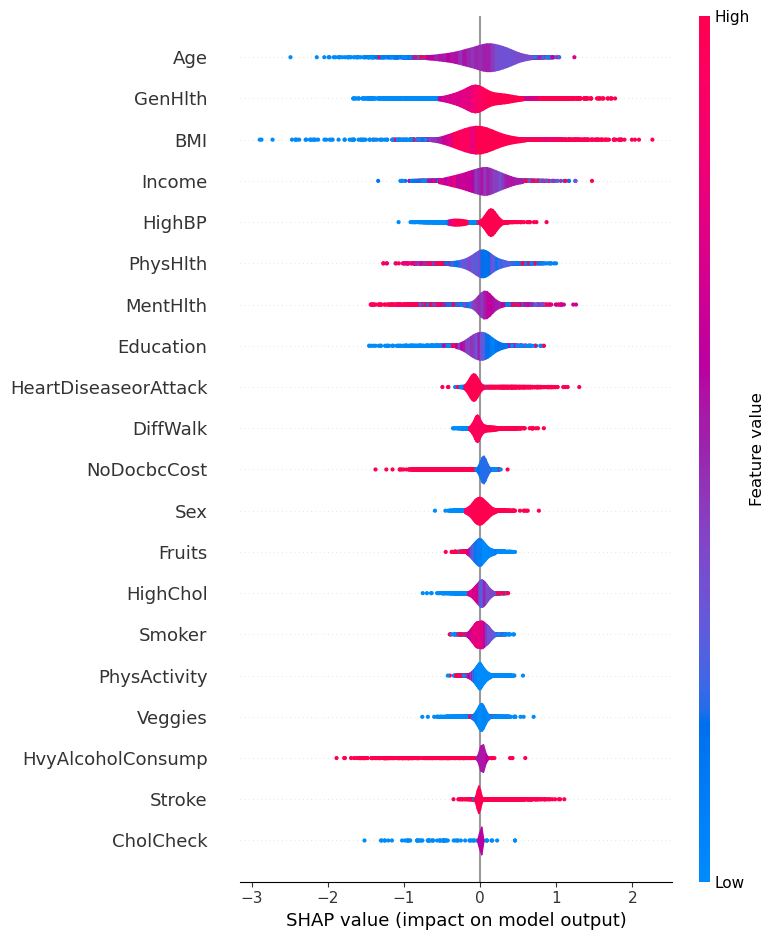

In [74]:
import shap
import xgboost as xgb

#Train an XGBoost model
model_xgb_fil = xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False, enable_categorical = True).fit(X_train_fil, y_train_fil)

#Explaining the model's predictions using SHAP values
explainer = shap.Explainer(model_xgb_fil)
shap_values = explainer(X_train_fil)

#Predictions and evaluations
y_pred_xgb_fil = model_xgb_fil.predict(X_test_fil)
accuracy_xgb_fil = accuracy_score(y_test_fil, y_pred_xgb_fil)
print("Accuracy of XGBoost for pre-diabetic and diabetic cases:", accuracy_xgb_fil)

#Plot summary of SHAP values
shap.summary_plot(shap_values, X_train_fil, plot_type="violin")